<a href="https://colab.research.google.com/github/VinceVence/deallocation-simulation/blob/master/Deallocation_Simulation_Software_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deallocation Simulation

`Deallocation` is simply defined as freeing an allocated memory space. Deallocating varies per system and the approaches may differ depending on the available Job Status of the memory blocks. A process has to be loaded into the RAM for its execution and remains in the RAM until its completion. Finished processes are deallocated or removed from the memory and new processes are allocated again. This is how the OS works with allocation and deallocation.

In high-level, programming memory deallocation is done by garbage collection. The absence of this in low-level programming makes deallocation even more necessary. There are different kinds of memory models that have different deallocation techniques.

**For fixed-partition system:**
* Straightforward process
* When job completes, Memory Manager resets the status of the job's memory block to "free".
* Any code--for example, binary values with 0 indicating free and 1 indicating busy--may be used.

**For dynamic-partition system:**
* Algorithm tries to combine free areas of memory whenever possible.
* Three cases:
 * **Case 1:** When the block to be deallocated is adjacent to another free block.
 * **Case 2:** When the block to be deallocated is between two free blocks.
 * **Case 3:** When the block to be deallocated is isolated from other free blocks.  


This simulations aims to give a visual overview of how deallocation works for both systems through the Python Programming Language.

## Importing Necessary Libraries
In this simulation, the dependencies that will be utilized are as follows:

* **NumPy:** NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
* **Pandas:** Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
* **Matplotlib:** Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.
* **IPython:** IPython is a command shell for interactive computing in multiple programming languages, originally developed for the Python programming language, that offers introspection, rich media, shell syntax, tab completion, and history. 
* **Time:** The time() function returns the number of seconds passed since epoch.


In [ ]:
# Installing the libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from IPython.display import display

# Ignore pandas chained assignment warning
pd.options.mode.chained_assignment = None  # default='warn'

# Enable inline visualizations
%matplotlib inline

## Adding Defaults and Miscellaneous Functions

In [ ]:
# Indicates the size of the memory block
NUM_JOBS  = 30

# Indicates the random seed used in the simulation
RANDOM_SEED = 42

# Indicates the max memory address limit
MAX_MEMORY = 15000

# Time latency function
def time_deallocation(memory_block_size, alpha=0.1, beta=1):
    """
    Sets up the time latency when deallocating a memory block size.
    """
    
    return (memory_block_size * alpha)/1000 + beta

In [ ]:
# Statistical and graphing function
def statistics(time_latency=[], df=None):
  """
  This is a function that provides statistical graphs about the necessary information encompassing deallocation.
  The graphs provided are:
    1. Memory Block Size Distribution
    2. Job Status Distribution
    3. Time Latency Distribution
    4. Memory Block Size Distribution
  """
  fig, ax = plt.subplots(2,2,figsize=(15, 10))
  ax[0, 0].bar(x=df.index, height=df['Memory Block Size'])
  ax[0, 0].set_xticks(range(30))
  ax[0, 0].set_xlabel('Table Block Index')
  ax[0, 0].set_ylabel('Memory Block Size')
  ax[0, 0].set_title('Memory Block Size Distribution')

  ax[0, 1].bar(x=df['Job Status'].value_counts().index, height=df['Job Status'].value_counts())
  ax[0, 1].set_xticks(df['Job Status'].value_counts().index.to_list())
  ax[0, 1].set_yticks(range(0, 25, 5))
  ax[0, 1].set_xlabel('Job Status')
  ax[0, 1].set_ylabel('Count')
  ax[0, 1].set_title('Job Status Distribution')

  ax[1, 0].plot(time_latency)
  ax[1, 0].set_xlabel('Deallocated Block Number')
  ax[1, 0].set_ylabel('Time Latency')
  ax[1, 0].set_title('Time Latency Distribution')

  ax[1, 1].bar([0, 1], [df[df['Job Status'] == 0]['Memory Block Size'].sum(), df[df['Job Status'] == 1]['Memory Block Size'].sum()])
  ax[1, 1].set_xticks(df['Job Status'].value_counts().index.to_list())
  ax[1, 1].set_xlabel('Job Status')
  ax[1, 1].set_ylabel('Cumulative Memory Block Size')
  ax[1, 1].set_title('Memory Block Size Distribution')

  plt.tight_layout()

  print(f"Total time latency = {np.sum(time_latency)}")
  print(f"Average time latency = {np.mean(time_latency)}")

## Fixed-Partition Systems Deallocation
This is the oldest and simplest technique used to put more than one process in the main memory. In this partitioning, the number of partitions (non-overlapping) in RAM is fixed but the size of each partition may or may not be the same. As it is a contiguous allocation, hence no spanning is allowed. Here partitions are made before execution or during system configure. 

In [ ]:
def generate_fixed_partition_dataframe(num_jobs):
    """
    This is a function that generates a memory block containing equally distributed memory address and block size, and randomized job status.
    """ 
    # Setup random seed for reproducing the simulation
    np.random.seed(RANDOM_SEED)

    random_memory_locations = np.linspace(1, MAX_MEMORY, NUM_JOBS, dtype='int')
    random_job_status = np.random.randint(0, 2, NUM_JOBS)
    memory_block_size = []
    
    for i in range(len(random_memory_locations) - 1):
        memory_block_size.append(random_memory_locations[i+1] - random_memory_locations[i])
    memory_block_size.append(np.random.randint(1, 1000, 1)[0])
    return pd.DataFrame({"Memory Address": random_memory_locations, 
                            "Memory Block Size": memory_block_size,
                            "Job Status": random_job_status})

### Generating random memory block for fixed partition system

**📝Note:** In the following cell, notice that there is a method called `np.random.seed(42)` placed above the generating function assignment. This just ensures that the generated block will produce the same output regardless of who runs the code. This is done for reproduction purposes and feel free to remove the code for generating your own randomized block.

In [ ]:
# Generate random memory block
np.random.seed(RANDOM_SEED)
df = generate_fixed_partition_dataframe(NUM_JOBS)
df

,Memory Address,Memory Block Size,Job Status
0,1,517,0
1,518,517,1
2,1035,517,0
3,1552,517,0
4,2069,518,0
5,2587,517,1
6,3104,517,0
7,3621,517,0
8,4138,517,0
9,4655,518,1


### Deallocating Fixed Partition

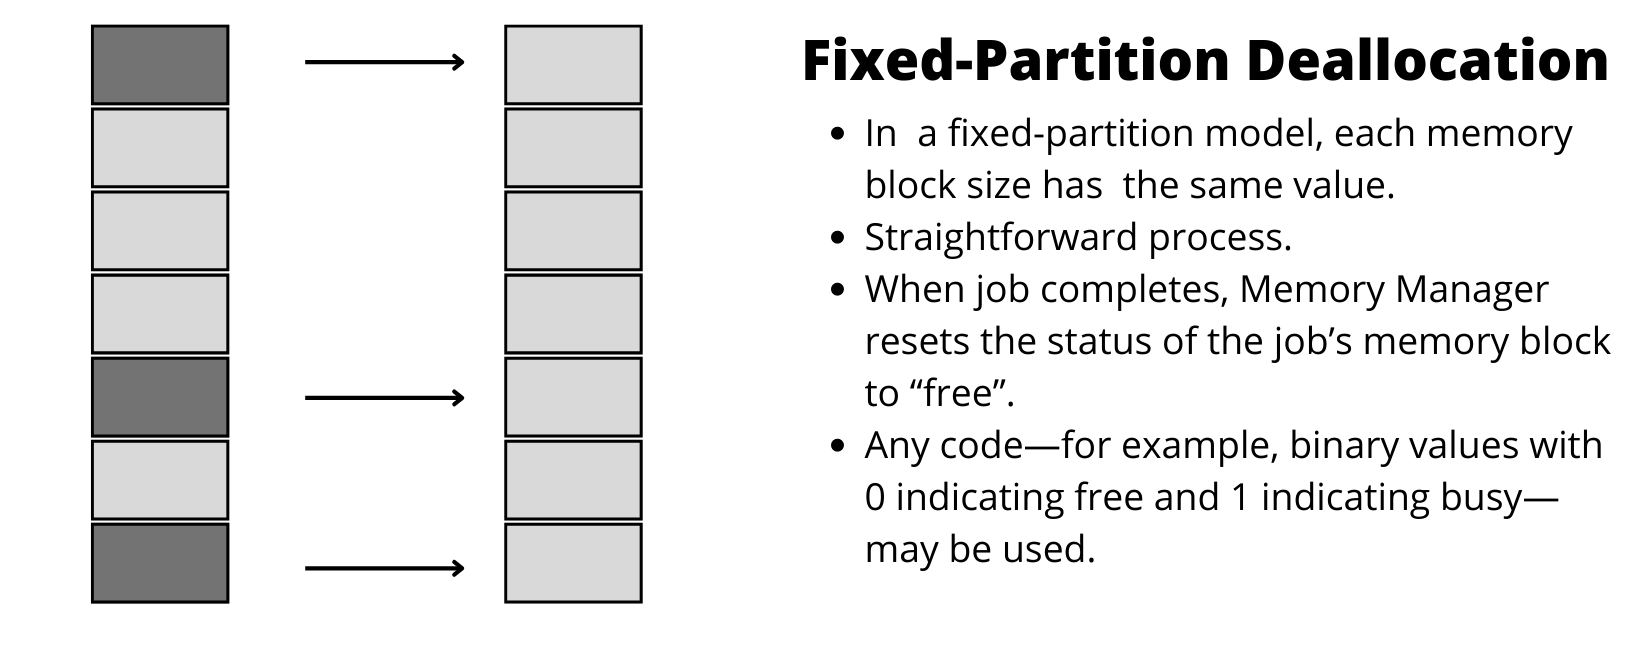

In [ ]:
def deallocate_fixed_partition(df):
    """
    This is a function that alters the dataframe parameter (df) by performing the fixed-partition deallocation algorithm as discussed above. 
    """
    deallocated_memory_count = 0
    time_latency = []
    for i in range(len(df)):
        if df["Job Status"].loc[i] == 1:
            # Simulating Fixed partition deallocation
            print(f"Deallocating Memory for Memory Address: {df['Memory Address'].loc[i]}...")
            time_ = time_deallocation(df["Memory Block Size"].loc[i])
            time_latency.append(time_)
            time.sleep(time_)
            df["Job Status"].loc[i] = 0
            deallocated_memory_count += 1
    print(f"Total memory deallocated: {deallocated_memory_count}")
    return time_latency

time_latency = deallocate_fixed_partition(df)

Deallocating Memory for Memory Address: 518...
Deallocating Memory for Memory Address: 2587...
Deallocating Memory for Memory Address: 4655...
Deallocating Memory for Memory Address: 7241...
Deallocating Memory for Memory Address: 8276...
Deallocating Memory for Memory Address: 8793...
Deallocating Memory for Memory Address: 9310...
Deallocating Memory for Memory Address: 10345...
Deallocating Memory for Memory Address: 11379...
Deallocating Memory for Memory Address: 11896...
Deallocating Memory for Memory Address: 12413...
Deallocating Memory for Memory Address: 12931...
Deallocating Memory for Memory Address: 13448...
Deallocating Memory for Memory Address: 13965...
Deallocating Memory for Memory Address: 14482...
Deallocating Memory for Memory Address: 15000...
Total memory deallocated: 16


### Visualizing the memory block after deallocation

Total time latency = 16.803600000000003
Average time latency = 1.0502250000000002


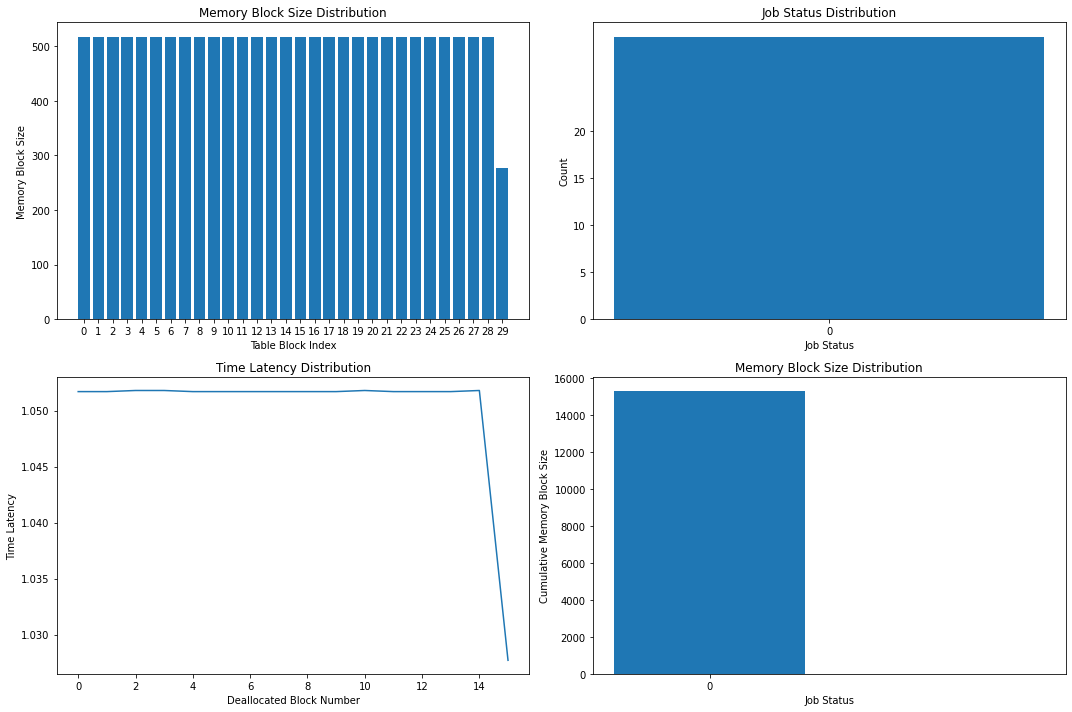

In [ ]:
statistics(time_latency, df=df)

In [ ]:
df

,Memory Address,Memory Block Size,Job Status
0,1,517,0
1,518,517,0
2,1035,517,0
3,1552,517,0
4,2069,518,0
5,2587,517,0
6,3104,517,0
7,3621,517,0
8,4138,517,0
9,4655,518,0


## Dyamic-Partition Systems Deallocation

Dynamic partitioning tries to overcome the problems caused by fixed partitioning. In this technique, the partition size is not declared initially. It is declared at the time of process loading.

The first partition is reserved for the operating system. The remaining space is divided into parts. The size of each partition will be equal to the size of the process. The partition size varies according to the need of the process so that the internal fragmentation can be avoided.

### Generating random memory block for dynamic partition system

**📝Note:** In the following cell, notice that there is a method called `np.random.seed(42)` placed above the generating function assignment. This just ensures that the generated block will produce the same output regardless of who runs the code. This is done for reproduction purposes and feel free to remove the code for generating your own randomized block.

In [ ]:
def generate_dynamic_partition_dataframe(num_jobs, case1=False, case2=False, case3=False):
    """
    This is a function that generates a memory block containing randomized distributed memory address, block size, job status.
    """
    np.random.seed(RANDOM_SEED)
    random_memory_locations = sorted(np.random.randint(1, MAX_MEMORY, num_jobs))
    random_job_status = np.random.randint(0, 2, num_jobs)
    memory_block_size = []
    
    for i in range(len(random_memory_locations) - 1):
        memory_block_size.append(random_memory_locations[i+1] - random_memory_locations[i])
    memory_block_size.append(np.random.randint(1, 1000, 1)[0])
    
    if case1:
        random_job_status[-1] = 0
        
    if case2:
        random_job_status = [0 if num % 2 == 0 else 1 for num in range(num_jobs)]
        random_job_status[-1] = 0
        random_job_status[0] = 0
        
    if case3:
        random_job_status[2] = 1
        random_job_status[1] = 1
        random_job_status[0] = 1
        
    
    return pd.DataFrame({"Memory Address": random_memory_locations, 
                         "Memory Block Size": memory_block_size,
                         "Job Status": random_job_status})

### Deallocating Dynamic Partition

**For dynamic-partition system:**
* Algorithm tries to combine free areas of memory whenever possible.
* Three cases:
 * **Case 1:** When the block to be deallocated is adjacent to another free block.
 * **Case 2:** When the block to be deallocated is between two free blocks.
 * **Case 3:** When the block to be deallocated is isolated from other free blocks. 

### Case 1: Joining Two Free Blocks

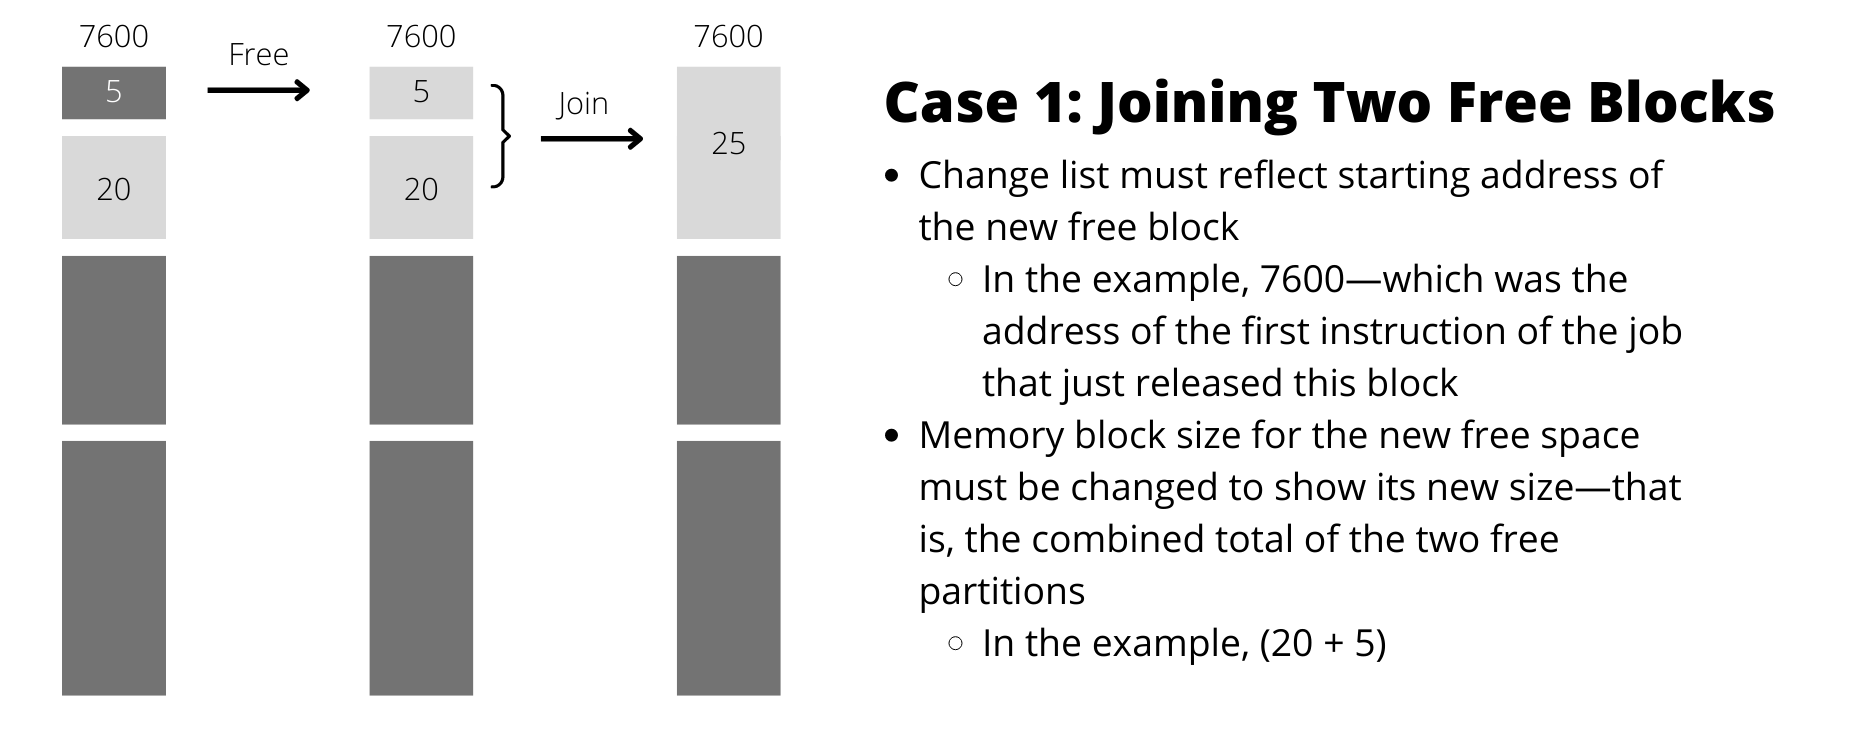



In [ ]:
# Generate random dataframe
np.random.seed(RANDOM_SEED)
df_case_1 = generate_dynamic_partition_dataframe(NUM_JOBS, case1=True)
df_case_1

,Memory Address,Memory Block Size,Job Status
0,467,303,1
1,770,91,0
2,861,324,1
3,1185,501,0
4,1686,748,0
5,2434,952,0
6,3386,1041,0
7,4427,129,0
8,4556,496,1
9,5052,140,1


#### Deallocating using case 1 dynamic-partition

In [ ]:
def deallocate_dynamic_case_1(df, one_iter=False):
    """
    This function takes a memory block dataframe as an input and simulates a dynamic
    memory deallocation based on case 1 parameters.
    """
    initial_len = len(df["Memory Address"])
    deallocated_memory_count = 0
    iterations = 1
    time_latency = []
    
    while df["Job Status"].nunique() != 1:
        print(f"Iteration Number: {iterations}")
        rows_to_drop = []
        for i in range(len(df) - 1):
            if df["Job Status"].loc[i] == 1 and df["Job Status"].loc[i + 1] == 0:
                # Simulating case 1 dyanmic partition deallocation
                print(f"\tWaiting for Memory in Memory address {df['Memory Address'].loc[i]} to be realeased (free)...")
                time_ = time_deallocation(df["Memory Block Size"].loc[i])
                time.sleep(time_)
                print(f"\tDeallocating Memory for Memory Address: {df['Memory Address'].loc[i]}...")
                print(f"\tJoining Memory Address {df['Memory Address'].loc[i]} and {df['Memory Address'].loc[i + 1]}\n")
                
                # Freeing job status
                df["Job Status"].loc[i] = 0

                # Joining memory address block sizes
                df["Memory Block Size"].loc[i] += df["Memory Block Size"].loc[i+1]

                # Putting the next memory address to rows to drop
                rows_to_drop.append(i + 1)

                # Memory deallocation time latency
                time.sleep(time_)
                time_latency.append(2 * time_)
                
        df.drop(rows_to_drop, inplace=True)
        df.reset_index(inplace=True, drop=True)
        if one_iter:
          break
        iterations +=1
    print(f"Total memory deallocated: {initial_len - len(df['Memory Address'])}.")
    return time_latency

In [ ]:
# Deallocating for every possible iterations using the case 1 parameters
time_latency_case_1 = deallocate_dynamic_case_1(df_case_1, one_iter=True)

Iteration Number: 1
	Waiting for Memory in Memory address 467 to be realeased (free)...
	Deallocating Memory for Memory Address: 467...
	Joining Memory Address 467 and 770

	Waiting for Memory in Memory address 861 to be realeased (free)...
	Deallocating Memory for Memory Address: 861...
	Joining Memory Address 861 and 1185

	Waiting for Memory in Memory address 5391 to be realeased (free)...
	Deallocating Memory for Memory Address: 5391...
	Joining Memory Address 5391 and 5579

	Waiting for Memory in Memory address 6266 to be realeased (free)...
	Deallocating Memory for Memory Address: 6266...
	Joining Memory Address 6266 and 6421

	Waiting for Memory in Memory address 6950 to be realeased (free)...
	Deallocating Memory for Memory Address: 6950...
	Joining Memory Address 6950 and 7271

	Waiting for Memory in Memory address 8323 to be realeased (free)...
	Deallocating Memory for Memory Address: 8323...
	Joining Memory Address 8323 and 10584

	Waiting for Memory in Memory address 11285 

#### Visualizing the memory block after deallocation using case 1

Total time latency = 14.7262
Average time latency = 2.103742857142857


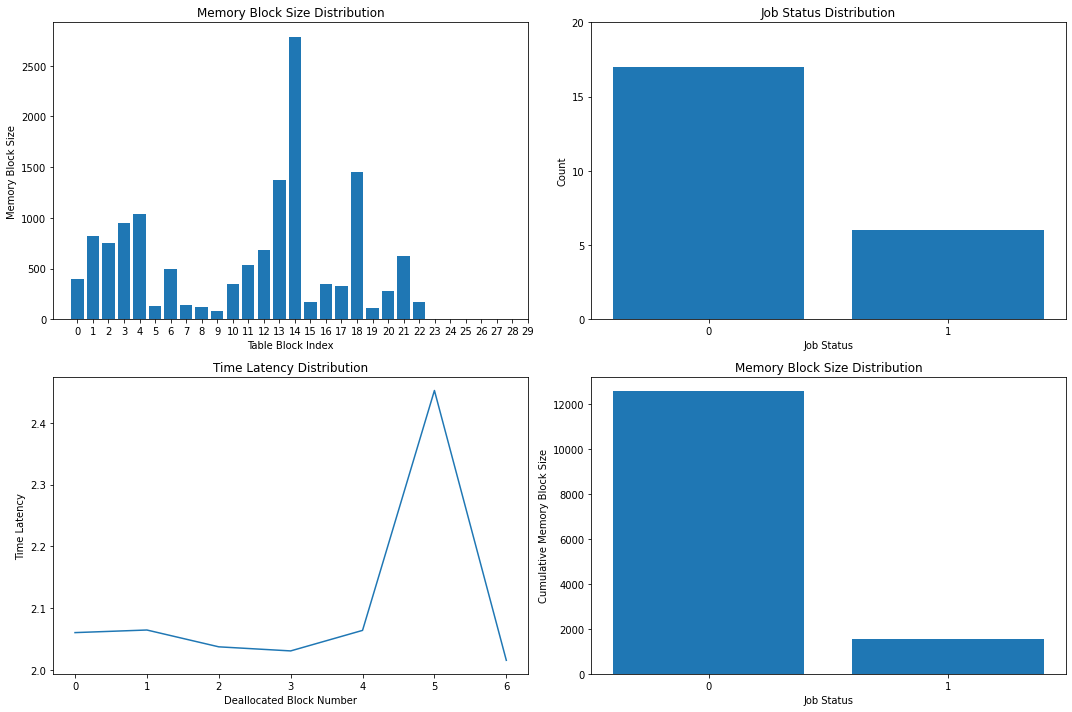

In [ ]:
statistics(time_latency_case_1, df=df_case_1)

In [ ]:
df_case_1

,Memory Address,Memory Block Size,Job Status
0,467,394,0
1,861,825,0
2,1686,748,0
3,2434,952,0
4,3386,1041,0
5,4427,129,0
6,4556,496,1
7,5052,140,1
8,5192,120,1
9,5312,79,1


### Case 2: Joining Three Free Blocks
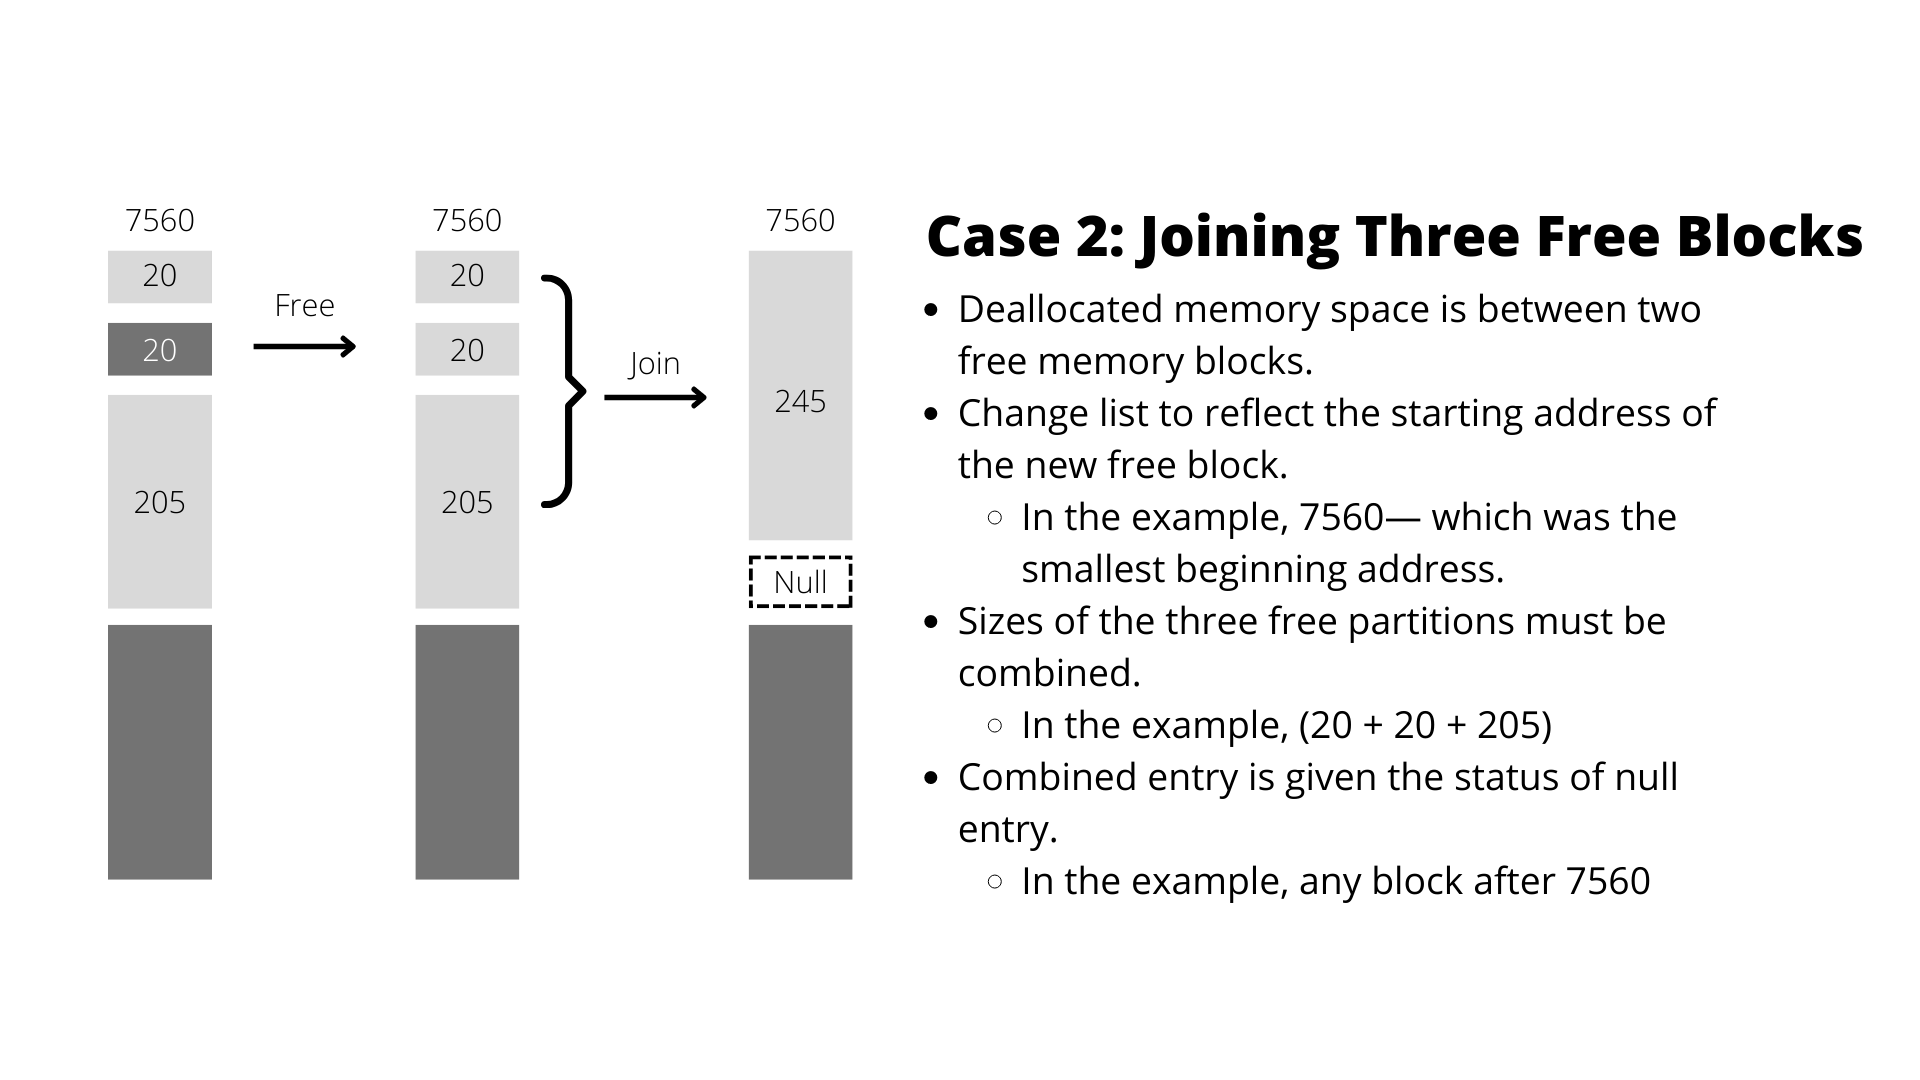

In [ ]:
# Generate random dataframe
np.random.seed(RANDOM_SEED)
df_case_2 = generate_dynamic_partition_dataframe(NUM_JOBS, case2=True)
df_case_2

,Memory Address,Memory Block Size,Job Status
0,467,303,0
1,770,91,1
2,861,324,0
3,1185,501,1
4,1686,748,0
5,2434,952,1
6,3386,1041,0
7,4427,129,1
8,4556,496,0
9,5052,140,1


#### Deallocating using case 2 dynamic-partition

In [ ]:
def deallocate_dynamic_case_2(df, remove_null=False):
    """
    This function takes a memory block dataframe as an input and simulates a dynamic
    memory deallocation based on case 2 parameters.
    """
    np.random.seed(RANDOM_SEED)
    iterations = 1
    initial_len = len(df["Memory Address"])
    time_latency = []
 
    rows_to_drop = []
    for i in range(1, len(df) - 2):
        if df["Job Status"].loc[i] == 1 and df["Job Status"].loc[i + 1] == 0 and df["Job Status"].loc[i - 1] == 0:
            # Simulating case 2 dyanmic partition deallocation
            print(f"Waiting for Memory in Memory address {df['Memory Address'].loc[i]} to be realeased (free)...")
            time_ = time_deallocation(df["Memory Block Size"].loc[i])
            time.sleep(time_)
            print(f"Deallocating Memory for Memory Address: {df['Memory Address'].loc[i]}...")
            print(f"Joining Memory Address {df['Memory Address'].loc[i-1]}, {df['Memory Address'].loc[i]} and {df['Memory Address'].loc[i+1]}\n")
                
            # Freeing job status
            df["Job Status"].loc[i] = 0

            # Joining memory address block sizes
            df["Memory Block Size"].loc[i-1] += df["Memory Block Size"].loc[i]
            df["Memory Block Size"].loc[i-1] += df["Memory Block Size"].loc[i+1]

            # Putting the next memory address to rows to drop
            rows_to_drop.append(i + 1)
                
            # Replace current memory location to a null entry
            df.loc[i, "Memory Address"] = "*"
            df.loc[i, "Memory Block Size"] = 0
            df.loc[i, "Job Status"] = None
            df.loc[i+1, "Job Status"] = 1

            time.sleep(time_)
            time_latency.append(2 * time_)
    df.drop(rows_to_drop, inplace=True)
    df.reset_index(inplace=True, drop=True)
    iterations +=1
    
    if remove_null:
    # Removing Null Entries
        print(f"Removing Null Entries...")
        null_entries = df[df['Job Status'].isna()].index
        time.sleep(len(null_entries))
        df.drop(null_entries, inplace=True)
        print(f"Total number of null entries removed: {len(null_entries)}")
        df.reset_index(inplace=True, drop=True)
        df['Job Status'] = df['Job Status'].apply(lambda x: int(x))
    print(f"Total memory deallocated: {initial_len - len(df['Memory Address'])}.")
    return time_latency

In [ ]:
# Deallocating for every possible iterations using the case 2 paramterS
time_latency_case_2 = deallocate_dynamic_case_2(df_case_2, True)

Waiting for Memory in Memory address 770 to be realeased (free)...
Deallocating Memory for Memory Address: 770...
Joining Memory Address 467, 770 and 861

Waiting for Memory in Memory address 2434 to be realeased (free)...
Deallocating Memory for Memory Address: 2434...
Joining Memory Address 1686, 2434 and 3386

Waiting for Memory in Memory address 5052 to be realeased (free)...
Deallocating Memory for Memory Address: 5052...
Joining Memory Address 4556, 5052 and 5192

Waiting for Memory in Memory address 5579 to be realeased (free)...
Deallocating Memory for Memory Address: 5579...
Joining Memory Address 5391, 5579 and 5735

Waiting for Memory in Memory address 6950 to be realeased (free)...
Deallocating Memory for Memory Address: 6950...
Joining Memory Address 6421, 6950 and 7271

Waiting for Memory in Memory address 11112 to be realeased (free)...
Deallocating Memory for Memory Address: 11112...
Joining Memory Address 10584, 11112 and 11285

Waiting for Memory in Memory address 119

#### Visualizing the memory block after deallocation using case 2

Total time latency = 14.657400000000003
Average time latency = 2.0939142857142863


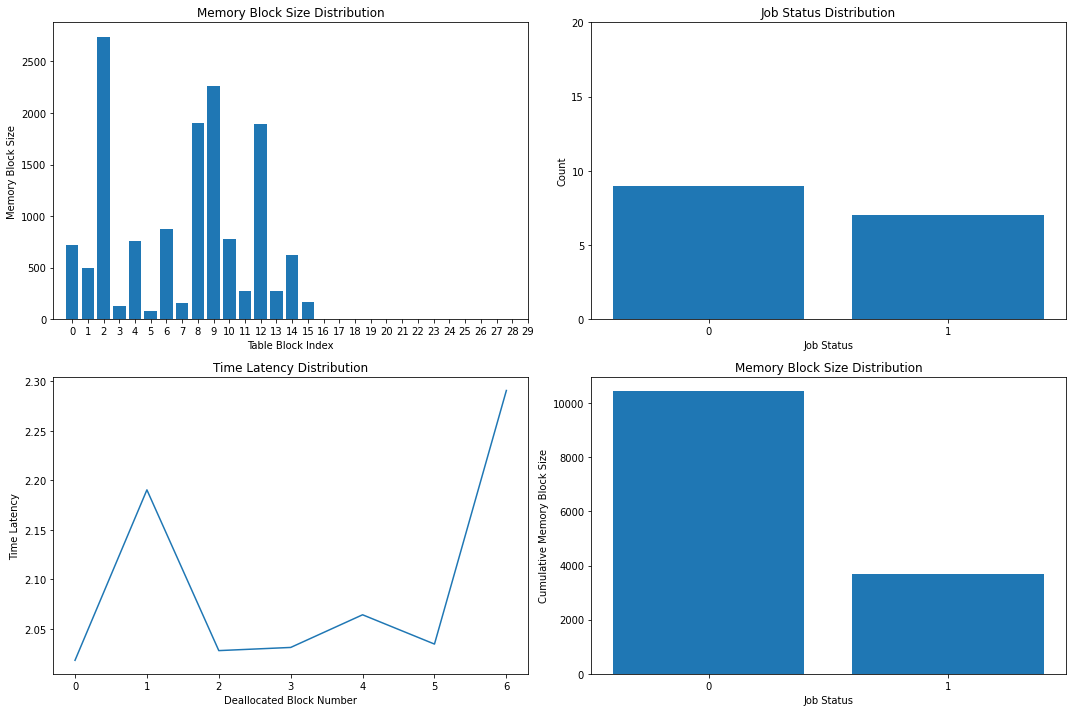

In [ ]:
statistics(time_latency_case_2, df=df_case_2)

In [ ]:
df_case_2

,Memory Address,Memory Block Size,Job Status
0,467,718,0
1,1185,501,1
2,1686,2741,0
3,4427,129,1
4,4556,756,0
5,5312,79,1
6,5391,875,0
7,6266,155,1
8,6421,1902,0
9,8323,2261,1


### Case 3: Deallocating an Isolated Block
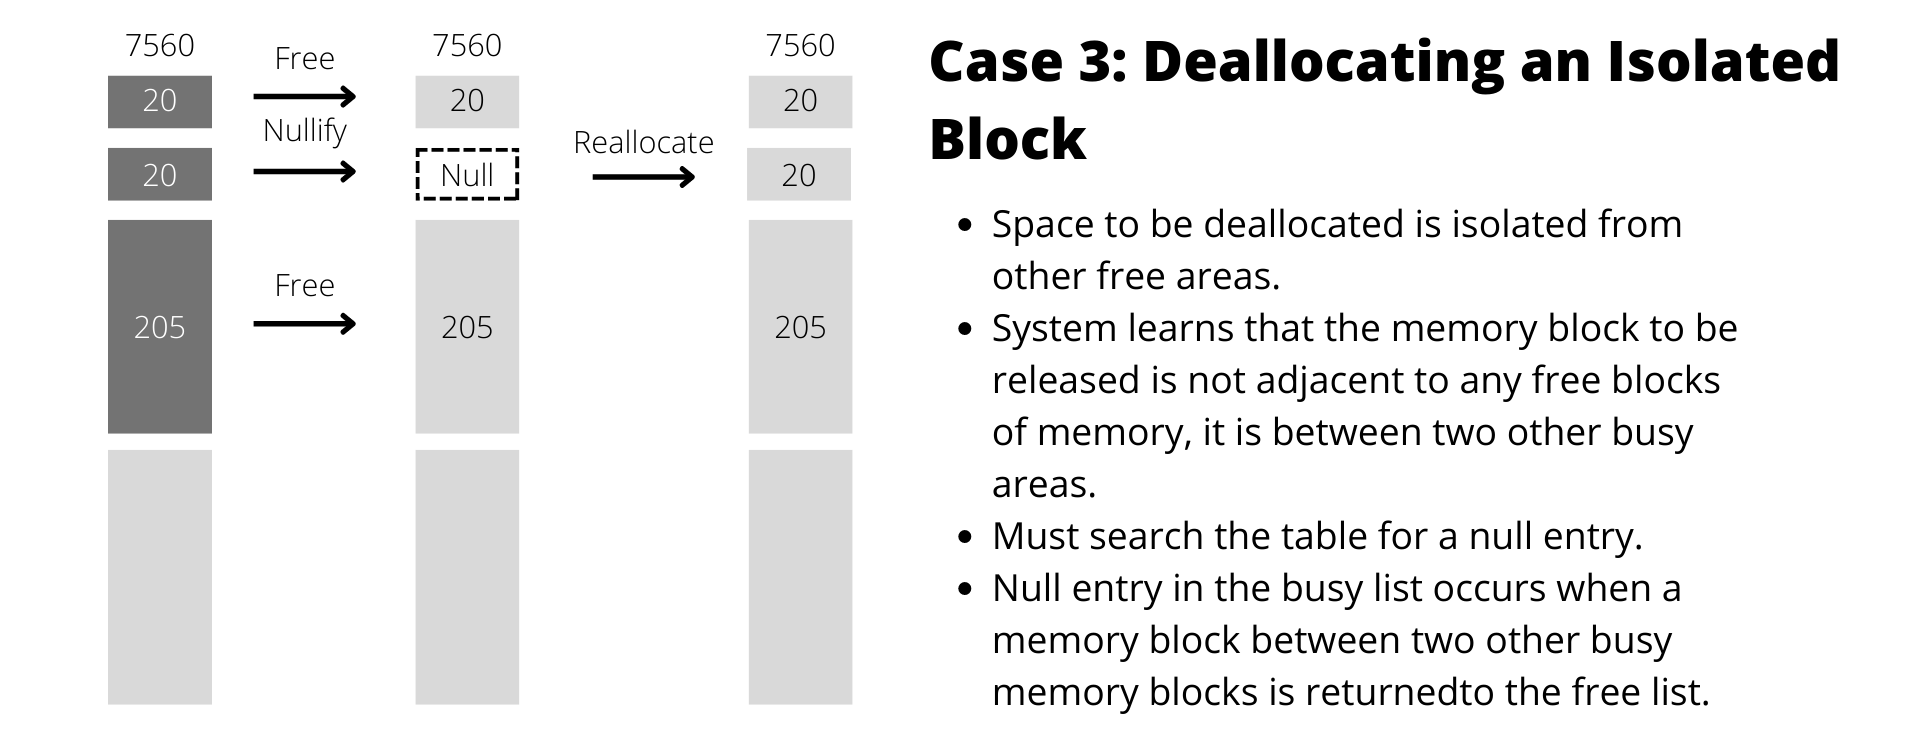

In [ ]:
# Generate random dataframe
np.random.seed(RANDOM_SEED)
df_case_3 = generate_dynamic_partition_dataframe(NUM_JOBS, case3=True)
df_case_3

,Memory Address,Memory Block Size,Job Status
0,467,303,1
1,770,91,1
2,861,324,1
3,1185,501,0
4,1686,748,0
5,2434,952,0
6,3386,1041,0
7,4427,129,0
8,4556,496,1
9,5052,140,1


#### Deallocating using case 3 dynamic-partition

In [ ]:
def deallocate_dynamic_case_3(df, freeing_latency=2):
    """
    This function takes a memory block DataFrame as an input and simulates a dynamic memory deallocation based on case 3 parameters.
    """
    initial_df = df.copy()
    time_latency = []
    
    for i in range(1, len(df) - 2):
        if df["Job Status"].loc[i] == 1 and df["Job Status"].loc[i + 1] == 1 and df["Job Status"].loc[i - 1] == 1:
            # Simulating case 2 dyanmic partition deallocation
            print(f"Deallocating Memory for Memory Address: {df['Memory Address'].loc[i]}...")
            print(f"Found two adjacent busy job status for Memory Address {df['Memory Address'].loc[i]}:")
            print(f"\t{df['Memory Address'].loc[i-1]}")
            print(f"\t{df['Memory Address'].loc[i+1]}")

            time_ = time_deallocation(df['Memory Block Size'].loc[i])
            time.sleep(time_)
            time_latency.append(time_)
                
            # Converting Current Memory as null entry
            df.loc[i, "Memory Address"] = "*"
            df.loc[i, "Memory Block Size"] = 0
            df.loc[i, "Job Status"] = None

    memory_deallocated = 0
    display(df)
    free_null = input("Free Null Memories [y/N]: ")
    if free_null == 'y':

        # Free Null Entries
        print(f"Freeing Null Entries...")
        time.sleep(freeing_latency)
        for i in range(1, len(df) - 2):
            if df['Job Status'].isna().values[i]:
                
                print(f"Now catering memory address: {initial_df['Memory Address'].loc[i]}")
                print(f"Waiting for adjacent memory address to be deallocated...")
                
                # Deallocating previous adjacent memory address
                df.loc[i-1, "Job Status"] = 0
                time.sleep(freeing_latency)
                print(f"\tAjacent memory address {df['Memory Address'].loc[i-1]} is now free!")
                
                # Deallocating next adjacent memory address
                df.loc[i+1, "Job Status"] = 0
                time.sleep(freeing_latency)
                print(f"\tAdjacent memory address {df['Memory Address'].loc[i+1]} is now free!\n")
                
                # Re-entry of the previously nulled memory address
                print(f"Reallocating memory address {initial_df['Memory Address'].loc[i]} to *\n")
                time.sleep(freeing_latency)
                
                # Deallocating the current memory address
                df.loc[i, "Memory Address"] = initial_df["Memory Address"].loc[i]
                df.loc[i, "Memory Block Size"] = initial_df["Memory Block Size"].loc[i]
                df.loc[i, "Job Status"] = 0
                time.sleep(freeing_latency)
                print(f"\tAdjacent memory address {df['Memory Address'].loc[i]} is now free!\n")
                
                memory_deallocated+=3
                
        df['Job Status'] = df['Job Status'].apply(lambda x: int(x))
    print(f"Total memory deallocated: {memory_deallocated}")
    return time_latency

In [ ]:
# Deallocating for every possible iterations using the case 3 paramter
time_latency_case_3 = deallocate_dynamic_case_3(df_case_3)

Deallocating Memory for Memory Address: 770...
Found two adjacent busy job status for Memory Address 770:
	467
	861
Deallocating Memory for Memory Address: 5052...
Found two adjacent busy job status for Memory Address 5052:
	4556
	5192
Deallocating Memory for Memory Address: 5312...
Found two adjacent busy job status for Memory Address 5312:
	5192
	5391


,Memory Address,Memory Block Size,Job Status
0,467,303,1.0
1,*,0,NaN
2,861,324,1.0
3,1185,501,0.0
4,1686,748,0.0
5,2434,952,0.0
6,3386,1041,0.0
7,4427,129,0.0
8,4556,496,1.0
9,*,0,NaN


Free Null Memories [y/N]: y
Freeing Null Entries...
Now catering memory address: 770
Waiting for adjacent memory address to be deallocated...
	Ajacent memory address 467 is now free!
	Adjacent memory address 861 is now free!

Reallocating memory address 770 to *

	Adjacent memory address 770 is now free!

Now catering memory address: 5052
Waiting for adjacent memory address to be deallocated...
	Ajacent memory address 4556 is now free!
	Adjacent memory address 5192 is now free!

Reallocating memory address 5052 to *

	Adjacent memory address 5052 is now free!

Now catering memory address: 5312
Waiting for adjacent memory address to be deallocated...
	Ajacent memory address 5192 is now free!
	Adjacent memory address 5391 is now free!

Reallocating memory address 5312 to *

	Adjacent memory address 5312 is now free!

Total memory deallocated: 9


#### Visualizing the memory block after deallocation using case 3

Total time latency = 3.0310000000000006
Average time latency = 1.0103333333333335


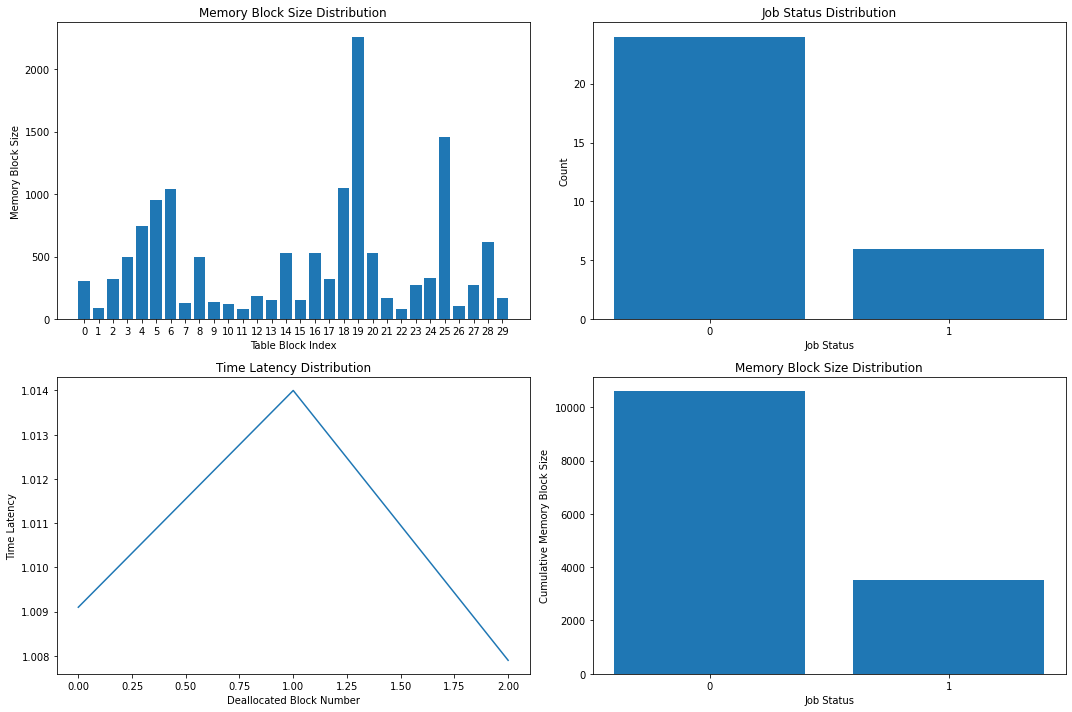

In [ ]:
statistics(time_latency_case_3, df=df_case_3)

In [ ]:
df_case_3

,Memory Address,Memory Block Size,Job Status
0,467,303,0
1,770,91,0
2,861,324,0
3,1185,501,0
4,1686,748,0
5,2434,952,0
6,3386,1041,0
7,4427,129,0
8,4556,496,0
9,5052,140,0
